# Compute the Velocity Auto-Correlation Function (VACF)

In [1]:
import sys
import timeit
import h5py
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import pythonpackage.computation
from pythonpackage.computation import correlation
import pythonpackage.plot
from pythonpackage.plot import plot_velocities, plot_vacf
from notebookstyle import css_styling
%matplotlib inline
css_styling()

### Packages versions

In [2]:
print("Python version: {}".format(sys.version))
print("NumPy version: {}".format(np.__version__))
print("Scipy version: {}".format(sp.__version__))
print("h5py version: {}".format(h5py.__version__))
print("Matplotlib version: {}".format(mpl.__version__))
print("computation module version: {}".format(pythonpackage.computation.__version__))
print("plot module version: {}".format(pythonpackage.plot.__version__))

Python version: 3.6.2 |Intel Corporation| (default, Aug 15 2017, 17:12:56) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
NumPy version: 1.13.1
Scipy version: 0.19.1
h5py version: 2.7.0
Matplotlib version: 2.0.2
computation module version: 0.1.0
plot module version: 0.2.0


## Read data

A 100ps molecular dynamics simulation (microcanonical (NVE) ensemble) of 256 water molecules (SPCE model).

In [3]:
file = 'Trajectories/spce300K_NVE_reduced_vacf.h5'

Explore the NetCDF file

In [4]:
with h5py.File(file, 'r') as f:
    ds = list(f.keys())
ds

['box_size', 'natoms', 'time', 'velocities']

Extract the datasets

In [5]:
with h5py.File(file, 'r') as f:
    time = np.copy(f['time'])
    box_size = np.copy(f['box_size'])
    velocities = np.copy(f['velocities'])
    natoms = np.copy(f['natoms'])

In [6]:
print(f"There are {natoms[0]} atoms and {time.shape[0]} steps.")
print(f"""The shape of the the velocities array is: {velocities.shape}. 
      The first dimension represents the steps, 
      the second dimension corresponds to the atoms and 
      the third dimension corresponds to the x, y, z velocities.""")

There are 768 atoms and 10001 steps.
The shape of the the velocities array is: (10001, 768, 3). 
      The first dimension represents the steps, 
      the second dimension corresponds to the atoms and 
      the third dimension corresponds to the x, y, z velocities.


## Plot velocity

Comparing the velocity of one oxygen atom and one hydrogen atom

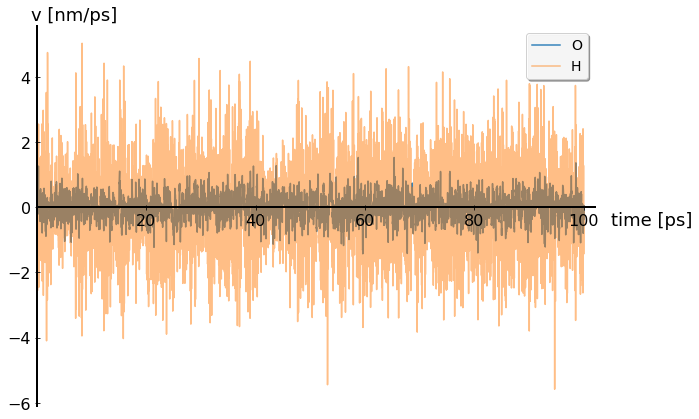

In [7]:
plot_velocities(np.vstack((time, velocities[:, 2, 0])), np.vstack((time, velocities[:, 0, 0])), legend=['O', 'H'])

## Compute VACF

All VACFs

In [8]:
vacf = np.array([correlation(velocities[:, i, :]) for i in range(natoms[0])])

##### Oxygen atoms

In [9]:
vacf_O = vacf[2::3]
# mean vacf
vacf_O = vacf_O.mean(axis=0)

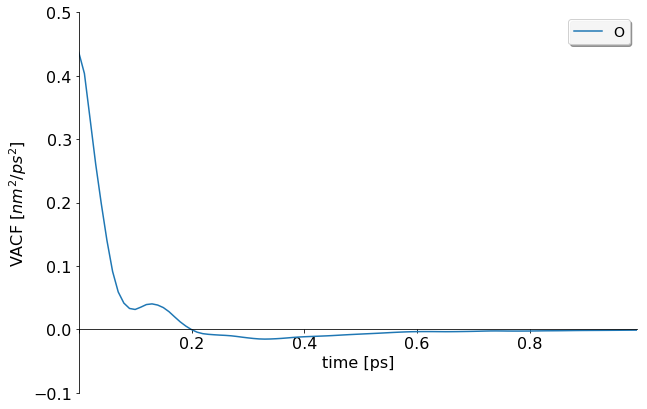

In [11]:
plot_vacf(np.vstack((time, vacf_O)), legend = 'O', percentage=0.01)

##### Hydrogen atoms

In [12]:
vacf_H1 = vacf[0::3]
vacf_H2 = vacf[1::3]
# mean vacf
vacf_H = (vacf_H1 + vacf_H2) / 2
vacf_H = vacf_H.mean(axis=0)

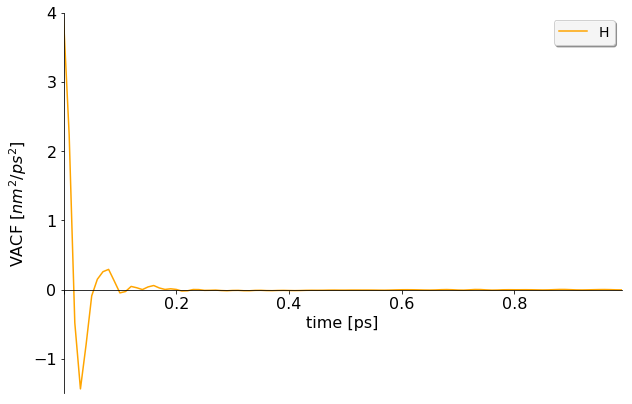

In [13]:
plot_vacf(np.vstack((time, vacf_H)), legend = 'H', percentage=0.01, color='orange')

##### Oxygen and hydrogen atoms

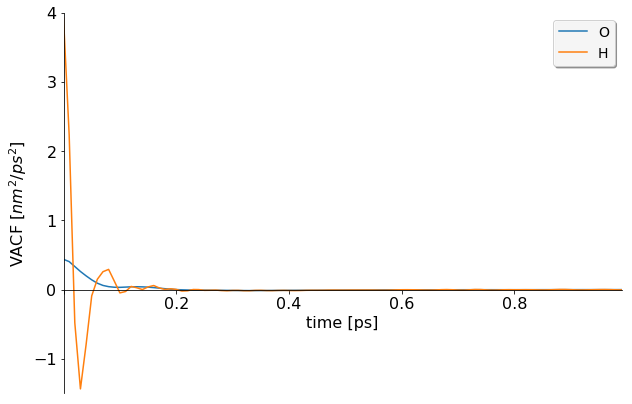

In [14]:
plot_vacf(np.vstack((time, vacf_O)), np.vstack((time, vacf_H)), legend = ['O', 'H'], percentage=0.01)